#### Name Dipika Sharma
#### DSC 550 T302 Data Mining
#### Week 4

# Exercise 4.2

In [1]:
## Importing the required libraries

import pandas as pd
import numpy as np

#### In this exercise, you will build a linear regression model to predict fuel efficiency (miles per gallon) of automobiles. Download the auto-mpg.csv dataset from: Auto-mpg dataset.

### 1. Load the data as a Pandas data frame and ensure that it imported correctly.

In [2]:
## Loading the cvs file data as panda dataframe

auto_mpg_df = pd.read_csv('auto-mpg.csv')

In [3]:
## Lets check the top five rows of the data frame to see if its loaded correctly

auto_mpg_df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
## Using shape function to see the number of rows and column in auto dataframe

print("The total number of rows and columns of auto-mpg dataframe: {}".format(auto_mpg_df.shape))

The total number of rows and columns of auto-mpg dataframe: (398, 9)


### We can see that suto-mfg data frame has 398 rows and 9 comlumns.

### 2. Begin by prepping the data for modeling: <br> &emsp; (i) Remove the car name column.

In [5]:
## Using drop function to remove car column from data frame.

auto_mpg_df = auto_mpg_df.drop(columns='car name')

## Lets check the top five rows of the data frame to see if the column car names drop correctly.

auto_mpg_df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


### &emsp; (ii) The horsepower column values likely imported as a string data type. Figure out why and replace any strings with the column mean.

In [6]:
## Lets check the data type of horsepower column

auto_mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


### We can see that the horsepower is object datatype.

In [7]:
## lets check some values of horsepower column.

auto_mpg_df['horsepower']

0      130
1      165
2      150
3      150
4      140
      ... 
393     86
394     52
395     84
396     79
397     82
Name: horsepower, Length: 398, dtype: object

In [8]:
## Lets check the unique values of the horsepower column

auto_mpg_df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

#### I looked into the kaggle site from where we have imported the data it says the dataset has 6 missing values for horsepower column, now I am seeing that the horsepower column has all the values float and no missing values but it has "?" value for some of the cars model.

#### Assuming that when the survey happened to collect the data for this dataset, the horsepower of some car models are not known and that is why it is showing "?" for those 6 missing values.

In [9]:
## using the to_numeric function with coerce as errors so then invalid parsing will be set as NaN.

auto_mpg_df['horsepower'] = auto_mpg_df['horsepower'].apply(pd.to_numeric, errors='coerce')

In [10]:
## Lets find out the mean of horsepower column.

hp_mean = auto_mpg_df['horsepower'].mean()
print("The mean of horsepower column in auto-mfg data frame is: {}".format(hp_mean))

The mean of horsepower column in auto-mfg data frame is: 104.46938775510205


In [11]:
## using fillna to replace NaN values with mean of the horsepower column.

auto_mpg_df['horsepower'] = auto_mpg_df['horsepower'].fillna(hp_mean)

In [12]:
## Lets check the datatype of the horsepower column again.

auto_mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


### As we can see that now the horsepower column data type is float.

### &emsp; (iii) Create dummy variables for the origin column.

In [13]:
## Using unique function to check the unique values for origin column.

auto_mpg_df['origin'].unique()

array([1, 3, 2])

### As we can see that the column origin has unique value 1, 2, and 3 so we will create dummy variables of these three categorical values of the origin.

In [14]:
## lets use get_dummies() method

pd.get_dummies(auto_mpg_df['origin'])

,1,2,3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
393,1,0,0
394,0,1,0
395,1,0,0
396,1,0,0


In [15]:
## Now since we know how it the dummy values will look
## Lets create the dummy variables origin_1, origin_3, and origin_2 for the origin column
## origin_1 variable values will be 1 of origin column value is 1 otherwise 0.
## origin_3 variable values will be 1 of origin column value is 3 otherwise 0.
## origin_2 variable values will be 1 of origin column value is 2 otherwise 0.

auto_mpg_df['origin_1'] = auto_mpg_df['origin'].apply(lambda x: 1 if x == 1 else 0) 
auto_mpg_df['origin_3'] = auto_mpg_df['origin'].apply(lambda x: 1 if x == 3 else 0)
auto_mpg_df['origin_2'] = auto_mpg_df['origin'].apply(lambda x: 1 if x == 2 else 0)

In [16]:
## Lets check the top five rows of the data frame to see if dummy variable created correctly

auto_mpg_df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,origin_1,origin_3,origin_2
0,18.0,8,307.0,130.0,3504,12.0,70,1,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,1,0,0


### 3. Create a correlation coefficient matrix and/or visualization. Are there features highly correlated with mpg?

In [17]:
## lets import the required libraries

import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
## Lets first create the correlation efficient matrix.
## using corr() function for the correlation efficient.

corr_matrix = auto_mpg_df.corr()

In [19]:
## Lets see the matrix first

corr_matrix

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,origin_1,origin_3,origin_2
mpg,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289,0.579267,0.563450,-0.568192,0.442174,0.259022
cylinders,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746,-0.562543,0.604351,-0.396479,-0.352861
displacement,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164,-0.609409,0.651407,-0.433505,-0.373886
horsepower,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651,-0.453669,0.486083,-0.321325,-0.281258
weight,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564,-0.581024,0.598398,-0.440817,-0.298843
acceleration,0.420289,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137,0.205873,-0.250806,0.109144,0.204473
model year,0.579267,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000,0.180662,-0.139883,0.193101,-0.024489
origin,0.563450,-0.562543,-0.609409,-0.453669,-0.581024,0.205873,0.180662,1.000000,-0.924486,0.886596,0.246332
origin_1,-0.568192,0.604351,0.651407,0.486083,0.598398,-0.250806,-0.139883,-0.924486,1.000000,-0.643317,-0.597198
origin_3,0.442174,-0.396479,-0.433505,-0.321325,-0.440817,0.109144,0.193101,0.886596,-0.643317,1.000000,-0.229895


#### yes, Looking above results we can clearly see that mpg is highly negatively correlated with weight, displacement, cylinder and horsepower. Which mean increase in any of the features - weight, displacement, cylinder and horsepower will have direct impact on mpg and mpg value will decrease.

#### Also we can see from above correlation matrix that (displacement and cylinders), (displacement and weight), (weight and cylinders), (displacement and horsepower) are highly positive correlated and increase in one will increase the other.

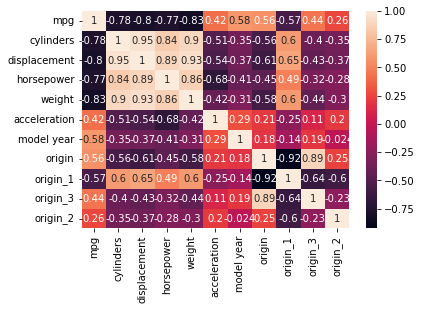

In [20]:
## Lets see if using plot also show the same observation taht we got above using matrix

## Using heatmap for correlation visualization

sns.heatmap(corr_matrix, annot = True)
plt.show()

#### The above visualization also show the strong negative correlation between mpg and features - cylinders, displacement, horsepower and weight.
#### Also it show strong positive correlation between cylinders & displacement, cylinders & weight, displacement & weight and displacement & horsepower.

### 4. Plot mpg versus weight. Analyze this graph and explain how it relates to the corresponding correlation coefficient.

Text(0, 0.5, 'Weight')

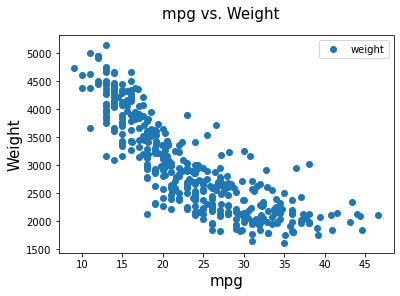

In [21]:
### From above correlation visualtion it is quite visible that mpg and weight are highly negative correlated.

### Lets plot the mpg and weight to understand the replationship more clearly.

auto_mpg_df.plot(x='mpg', y='weight', style='o')
plt.suptitle('mpg vs. Weight', fontsize=15)
plt.xlabel('mpg', fontsize=15)
plt.ylabel('Weight', fontsize=15)

#### From the above graph we can clearly say that the as weight of the vehicles increases, the mpg of the vehicles will decrease. And if weight of the vehicles is less then the mpg of the vehcles is high.
#### This result matches with what we got from correlation visualization that weight and mpg is highly negative correlated wih each other.

### 5. Randomly split the data into 80% training data and 20% test data, where your target is mpg.

In [22]:
## Lets check the columns of the existing dataframe.

auto_mpg_df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'origin_1', 'origin_3',
       'origin_2'],
      dtype='object')

In [23]:
## Lets create copy of existing dataframe using copy function.

auto_df = auto_mpg_df.copy()

In [24]:
## Now using drop function to drop the clumn mpg from new data frame.

auto_df = auto_df.drop(columns = ['mpg'])

In [25]:
## lets check the coulmns of the new data fram without mpg column

auto_df.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model year', 'origin', 'origin_1', 'origin_3', 'origin_2'],
      dtype='object')

In [26]:
## Let import the Importing train_test_split module from sklearn

from sklearn.model_selection import train_test_split

In [27]:
## Pareto Principle Split
## Using train_test_split function to split the data into 80% training and 20% testing.

X_train, X_test, Y_train, Y_test = train_test_split(auto_df, auto_mpg_df['mpg'], test_size= 0.2)

In [28]:
## lets check the number of rows and columns of the split data

print("The shape of X training dataset is: {}".format(X_train.shape))
print("The shape of Y training dataset is: {}".format(Y_train.shape))
print("The shape of X testing dataset is: {}".format(X_test.shape))
print("The shape of Y testing dataset is: {}".format(Y_test.shape))

The shape of X training dataset is: (318, 10)
The shape of Y training dataset is: (318,)
The shape of X testing dataset is: (80, 10)
The shape of Y testing dataset is: (80,)


### As we can see that the rows of the X data matches with Y data for both training and testing.

### 6. Train an ordinary linear regression on the training data.

In [29]:
## lets import the LinearRegression library

from sklearn.linear_model import LinearRegression

In [30]:
## lets create the linear regression model

lin_reg = LinearRegression()

In [31]:
## Lets train the linear regression on the training data.

lin_reg.fit(X_train, Y_train)

LinearRegression()

In [32]:
## Lets make the prediction on test data

lin_reg_pred_test = lin_reg.predict(X_test)

In [33]:
# Lets make the prediction on train data

lin_reg_pred_train = lin_reg.predict(X_train)

### 7. Calculate R2, RMSE, and MAE on both the training and test sets and interpret your results.

In [34]:
## Lets imports the required libraries.

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt

In [35]:
## lets calculate the R2, RMSE and MAE on training set.

print("Coefficients:\n", lin_reg.coef_)
print("The Coefficient of Determination (R2) is:", r2_score(Y_train, lin_reg_pred_train))
print("The Root Mean Squared Error (RMSE) is:", sqrt(mean_squared_error(Y_train, lin_reg_pred_train)))
print("The Mean Absolute Error (MAE) is:", mean_absolute_error(Y_train, lin_reg_pred_train))

Coefficients:
 [-0.59570024  0.02082852 -0.00775402 -0.0067357   0.06412565  0.74145217
  0.89202644 -0.82789558  0.06413085  0.76376473]
The Coefficient of Determination (R2) is: 0.8348123220971622
The Root Mean Squared Error (RMSE) is: 3.171733037563727
The Mean Absolute Error (MAE) is: 2.3976481312195577


#### R2 is 82% which is large, it means that the regression model fitting the observation. When the R2 value is high it suggest the better fit for the model.

#### The RMSE value is low as 3.25 which suggest the accuracy of prediction are close and suggest that the model is close to accuracy.

#### MAE value more close to zero, the more accuarte the model is. As we can see that the MAE value is low as 2.5 that suggest predictive model is relatively accurate and forecast value are close to true value.

In [36]:
## lets calculate the R2, RMSE and MAE on testing set.

print("The Coefficient of Determination (R2) is:", r2_score(Y_test, lin_reg_pred_test))
print("The Root Mean Squared Error (RMSE) is:", sqrt(mean_squared_error(Y_test, lin_reg_pred_test)))
print("The Mean Absolute Error (MAE) is:", mean_absolute_error(Y_test, lin_reg_pred_test))

The Coefficient of Determination (R2) is: 0.7773451007752371
The Root Mean Squared Error (RMSE) is: 3.684249390910379
The Mean Absolute Error (MAE) is: 2.90533325327375


#### R2 is 83% which is large, it means that the regression model fitting the observation. When the R2 value is high it suggest the better fit for the model.
#### The RMSE value is low as 3.38 which suggest the accuracy of prediction are close and suggest that the model is close to accuracy.
#### MAE value more close to zero, the more accuarte the model is. As we can see that the MAE value is low as 2.4 that suggest predictive model is relatively accurate and forecast value are close to true value.

### 8. Pick another regression model and repeat the previous two steps. Note: Do NOT choose logistic regression as it is more like a classification model.

In [37]:
## Lets import the required libraries for Ridge Regression model

from sklearn import linear_model

In [38]:
## Lets train the model on the training data.

Ridge_reg = linear_model.Ridge().fit(X_train, Y_train)

In [39]:
## Lets make the prediction on train data

Ridge_reg_pred_train = Ridge_reg.predict(X_train)

In [40]:
## Lets make the prediction on test data

Ridge_reg_pred_test = Ridge_reg.predict(X_test)

In [41]:
## lets calculate the R2, RMSE and MAE on training set.

print("Coefficients:\n", Ridge_reg.coef_)
print("The Coefficient of Determination (R2) is:", r2_score(Y_train, Ridge_reg_pred_train))
print("The Root Mean Squared Error (RMSE) is:", sqrt(mean_squared_error(Y_train, Ridge_reg_pred_train)))
print("The Mean Absolute Error (MAE) is:", mean_absolute_error(Y_train, Ridge_reg_pred_train))

Coefficients:
 [-0.58728347  0.02056921 -0.0076305  -0.00673532  0.06406972  0.74080419
  0.88631426 -0.81796402  0.06835023  0.74961379]
The Coefficient of Determination (R2) is: 0.8348108278018438
The Root Mean Squared Error (RMSE) is: 3.1717473833526215
The Mean Absolute Error (MAE) is: 2.3968658706033814


#### R2 is 82% which is large, it means that the regression model fitting the observation. When the R2 value is high it suggest the better fit for the model.
#### The RMSE value is low as 3.25 which suggest the accuracy of prediction are close and suggest that the model is close to accuracy.
#### MAE value more close to zero, the more accuarte the model is. As we can see that the MAE value is low as 2.5 that suggest predictive model is relatively accurate and forecast value are close to true value.

In [42]:
## lets calculate the R2, RMSE and MAE on testing set.

print("The Coefficient of Determination (R2) is:", r2_score(Y_test, Ridge_reg_pred_test))
print("The Root Mean Squared Error (RMSE) is:", sqrt(mean_squared_error(Y_test, Ridge_reg_pred_test)))
print("The Mean Absolute Error (MAE) is:", mean_absolute_error(Y_test, Ridge_reg_pred_test))

The Coefficient of Determination (R2) is: 0.7772528705927433
The Root Mean Squared Error (RMSE) is: 3.6850123739246112
The Mean Absolute Error (MAE) is: 2.9065903337884023


#### R2 is 83% which is large, it means that the regression model fitting the observation. When the R2 value is high it suggest the better fit for the model.
#### The RMSE value is low as 3.39 which suggest the accuracy of prediction are close and suggest that the model is close to accuracy.
#### MAE value more close to zero, the more accuarte the model is. As we can see that the MAE value is low as 2.4 that suggest predictive model is relatively accurate and forecast value are close to true value.

#### As we can see that both the model linear regression and Ridge regression model results have almost same results.